In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("dataset.csv")
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [4]:
print(df.isnull().sum())

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [5]:
df=df.dropna(subset=['popularity'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [6]:
Feature_columns = [
    'danceability', 'energy', 'loudness', 'speechiness', 
    'acousticness', 'instrumentalness', 'liveness', 'valence', 
    'tempo', 'duration_ms'
]

X=df[Feature_columns]
y=df['popularity']

print(f"Shape of input columns: {X.shape}")
print(f"Shape of output target: {y.shape}")

Shape of input columns: (114000, 10)
Shape of output target: (114000,)


In [7]:
X=X.fillna(X.mean())

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

In [9]:
Xtr,Xts,ytr,yts=train_test_split(X,y,test_size=0.30,random_state=42)
print(f"The shape of training inputs: {Xtr.shape,ytr.shape}")
print(f"The shape of testing inputs: {Xts.shape,yts.shape}")

The shape of training inputs: ((79800, 10), (79800,))
The shape of testing inputs: ((34200, 10), (34200,))


In [10]:
lnmodel=LinearRegression()
lnmodel.fit(Xtr,ytr)
ytr_pred=lnmodel.predict(Xtr)
print(f"The mean square error based on training data is: {ytr,ytr_pred}")
print(f"The mean absolute error based on training data is: {ytr,ytr_pred}")
print(f"The r2 score based on training data is: {r2_score(ytr,ytr_pred)}")

The mean square error based on training data is: (41996     22
76471     22
54809     37
16326      0
109799    27
          ..
76820     49
110268    30
103694     0
860       44
15795     55
Name: popularity, Length: 79800, dtype: int64, array([33.76494266, 35.33308605, 31.95186765, ..., 31.09866018,
       36.80993833, 30.80091117], shape=(79800,)))
The mean absolute error based on training data is: (41996     22
76471     22
54809     37
16326      0
109799    27
          ..
76820     49
110268    30
103694     0
860       44
15795     55
Name: popularity, Length: 79800, dtype: int64, array([33.76494266, 35.33308605, 31.95186765, ..., 31.09866018,
       36.80993833, 30.80091117], shape=(79800,)))
The r2 score based on training data is: 0.022953444234598774


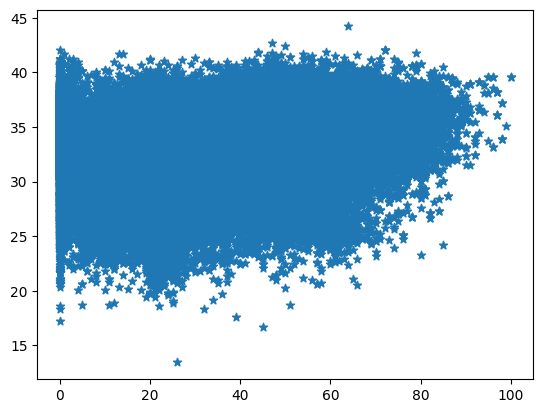

In [11]:
plt.scatter(ytr,ytr_pred,marker='*')

In [12]:
yts_pred=lnmodel.predict(Xts)
print(f"The mean square error based on testing data is: {mean_squared_error(yts,yts_pred)}")
print(f"The mean absolute error based on testing data is: {mean_absolute_error(yts,yts_pred)}")
print(f"The r2 score based on testing data is;: {r2_score(yts,yts_pred)}")

The mean square error based on testing data is: 484.12237365611975
The mean absolute error based on testing data is: 18.375968859756362
The r2 score based on testing data is;: 0.021628572596767204


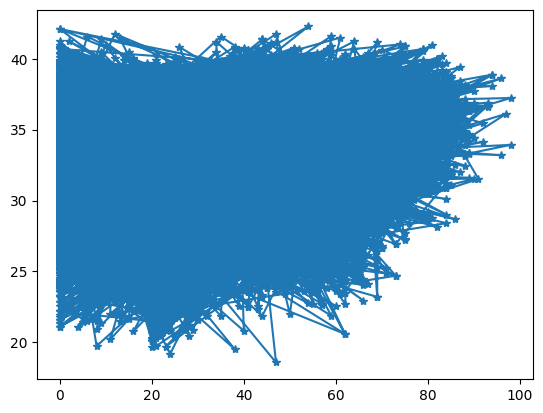

In [13]:
plt.plot(yts,yts_pred,marker='*')

In [14]:
popularity_treshhold=df['popularity'].quantile(0.75)
print(f"The popularity threshhold is: {popularity_treshhold}")

The popularity threshhold is: 50.0


In [15]:
df['is_hit']=(df['popularity'] >= popularity_treshhold).astype(int)
print(f"Hit songs: {df['is_hit'].sum()} ({df['is_hit'].mean()*100:.1f}%)")
print(f"Non-hit songs: {(df['is_hit'] == 0).sum()} ({ (df['is_hit'] == 0).mean()*100:.1f}%)")


Hit songs: 29367 (25.8%)
Non-hit songs: 84633 (74.2%)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler

In [17]:
feature_columns = ['danceability', 'energy', 'loudness', 'speechiness', 
                   'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

X_class=df[feature_columns]
y_class=df['is_hit']

In [18]:
X_tr,X_ts,y_tr,y_ts=train_test_split(X_class,y_class,test_size=0.30,random_state=42,stratify=y_class)
scalar=StandardScaler()
X_tr_scaled=scalar.fit_transform(X_tr)
X_ts_scaled=scalar.fit_transform(X_ts)


In [19]:
Logmodel=LogisticRegression()
Logmodel.fit(X_tr_scaled,y_tr)
y_tr_pred=Logmodel.predict(X_tr_scaled)
print(f"The accuracy score based on training data is: {accuracy_score(y_tr_pred,y_tr)*100} per cent")
print(f"The classification report based on training data is: {classification_report(y_tr,y_tr_pred)}")

The accuracy score based on training data is: 74.24436090225564 per cent
The classification report based on training data is:               precision    recall  f1-score   support

           0       0.74      1.00      0.85     59243
           1       0.61      0.00      0.00     20557

    accuracy                           0.74     79800
   macro avg       0.68      0.50      0.43     79800
weighted avg       0.71      0.74      0.63     79800



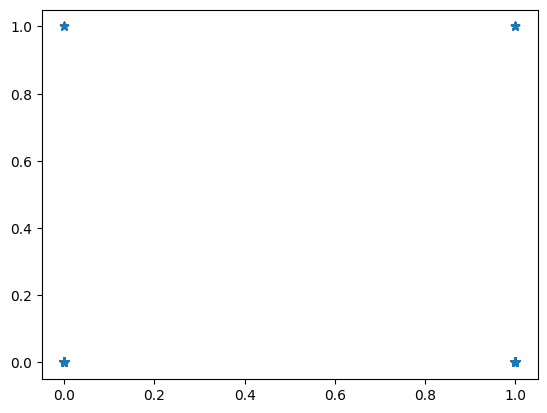

In [20]:
plt.scatter(y_tr,y_tr_pred,marker='*')

The accuracy score based on training data is: 74.23684210526315 per cent
The classification report based on testing data is:              precision    recall  f1-score   support

           0       0.74      1.00      0.85     25390
           1       0.40      0.00      0.00      8810

    accuracy                           0.74     34200
   macro avg       0.57      0.50      0.43     34200
weighted avg       0.65      0.74      0.63     34200



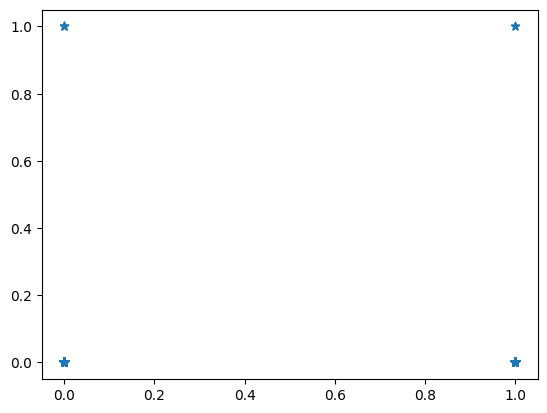

In [21]:
Y_ts_pred=Logmodel.predict(X_ts_scaled)
print(f"The accuracy score based on training data is: {accuracy_score(Y_ts_pred,y_ts)*100} per cent")
print(f"The classification report based on testing data is:{classification_report(y_ts,Y_ts_pred)}")
plt.scatter(y_ts,Y_ts_pred,marker="*")

In [22]:
log_model_balanced=LogisticRegression(random_state=42,class_weight='balanced',max_iter=1000)
log_model_balanced.fit(X_tr_scaled,y_tr)
Y_pred_bl=log_model_balanced.predict(X_tr_scaled)
print(f"The accuracy score based on training data is: { accuracy_score(y_tr,Y_pred_bl)*100} per cent")
print(f"The classification report based on training data is: {classification_report(y_tr,Y_pred_bl)}")

The accuracy score based on training data is: 55.93358395989975 per cent
The classification report based on training data is:               precision    recall  f1-score   support

           0       0.81      0.53      0.64     59243
           1       0.32      0.63      0.42     20557

    accuracy                           0.56     79800
   macro avg       0.56      0.58      0.53     79800
weighted avg       0.68      0.56      0.59     79800



In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve, auc

# Hyperparameter tuning for better performance
param_grid = {
    'C': [0.1, 1, 10, 100],
    'class_weight': ['balanced', {0: 1, 1: 2}, {0: 1, 1: 3}],
    'max_iter': [1000, 2000]
}

# Use a smaller subset for faster grid search
grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1
)

# Fit on smaller subset for speed
sample_size = min(10000, len(X_tr_scaled))
grid_search.fit(X_tr_scaled[:sample_size], y_tr[:sample_size])

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Train final model with best parameters
best_log_model = grid_search.best_estimator_
best_log_model.fit(X_tr_scaled, y_tr)

y_pred_best = best_log_model.predict(X_ts_scaled)
y_pred_proba_best = best_log_model.predict_proba(X_ts_scaled)[:, 1]

print("\n=== OPTIMIZED MODEL ===")
print(f"Accuracy: {accuracy_score(y_ts, y_pred_best):.4f}")
print(classification_report(y_ts, y_pred_best))

Best parameters: {'C': 1, 'class_weight': {0: 1, 1: 3}, 'max_iter': 1000}
Best cross-validation score: 0.41594156546217914

=== OPTIMIZED MODEL ===
Accuracy: 0.5361
              precision    recall  f1-score   support

           0       0.81      0.49      0.61     25390
           1       0.31      0.66      0.42      8810

    accuracy                           0.54     34200
   macro avg       0.56      0.58      0.52     34200
weighted avg       0.68      0.54      0.56     34200



In [24]:
# Get feature coefficients for interpretation
feature_analysis = pd.DataFrame({
    'feature': feature_columns,
    'coefficient': best_log_model.coef_[0],
    'impact_strength': np.abs(best_log_model.coef_[0])
}).sort_values('impact_strength', ascending=False)

# Calculate practical impact (odds ratios)
feature_analysis['odds_ratio'] = np.exp(feature_analysis['coefficient'])
feature_analysis['impact_percentage'] = (feature_analysis['odds_ratio'] - 1) * 100

print("🎵 BUSINESS INSIGHTS - What Makes a Hit Song? 🎵")
print("="*55)

print("\n📊 TOP PREDICTORS OF SONG SUCCESS:")
top_features = feature_analysis.head(5)
for _, row in top_features.iterrows():
    direction = "INCREASES" if row['coefficient'] > 0 else "REDUCES"
    impact = f"+{row['impact_percentage']:.1f}%" if row['coefficient'] > 0 else f"{row['impact_percentage']:.1f}%"
    print(f"  • {row['feature'].title():18} {direction} hit probability by {impact}")

print("\n💡 PRACTICAL INTERPRETATION:")
print(f"  - Every 1-unit increase in {top_features.iloc[0]['feature']} increases hit odds by {top_features.iloc[0]['impact_percentage']:.1f}%")
print(f"  - Higher {top_features.iloc[1]['feature']} significantly boosts popularity potential")
print(f"  - {top_features.iloc[2]['feature'].title()} has a strong {'positive' if top_features.iloc[2]['coefficient'] > 0 else 'negative'} impact")

# Compare hit vs non-hit characteristics
hit_songs = df[df['is_hit'] == 1]
non_hit_songs = df[df['is_hit'] == 0]

print(f"\n📈 CHARACTERISTICS OF HIT SONGS vs NON-HITS:")
for feature in top_features.head(3)['feature']:
    hit_mean = hit_songs[feature].mean()
    nonhit_mean = non_hit_songs[feature].mean()
    difference = hit_mean - nonhit_mean
    print(f"  • {feature:18} Hits: {hit_mean:.3f} vs Non-hits: {nonhit_mean:.3f} (diff: {difference:+.3f})")

🎵 BUSINESS INSIGHTS - What Makes a Hit Song? 🎵

📊 TOP PREDICTORS OF SONG SUCCESS:
  • Instrumentalness   REDUCES hit probability by -24.1%
  • Valence            REDUCES hit probability by -22.5%
  • Liveness           REDUCES hit probability by -17.5%
  • Energy             REDUCES hit probability by -15.9%
  • Danceability       INCREASES hit probability by +18.3%

💡 PRACTICAL INTERPRETATION:
  - Every 1-unit increase in instrumentalness increases hit odds by -24.1%
  - Higher valence significantly boosts popularity potential
  - Liveness has a strong negative impact

📈 CHARACTERISTICS OF HIT SONGS vs NON-HITS:
  • instrumentalness   Hits: 0.115 vs Non-hits: 0.170 (diff: -0.056)
  • valence            Hits: 0.453 vs Non-hits: 0.481 (diff: -0.029)
  • liveness           Hits: 0.185 vs Non-hits: 0.223 (diff: -0.038)


In [25]:
# Let's get the correct predictions for both training and testing sets
y_train_pred = best_log_model.predict(X_tr_scaled)
y_test_pred = best_log_model.predict(X_ts_scaled)

y_train_proba = best_log_model.predict_proba(X_tr_scaled)[:, 1]
y_test_proba = best_log_model.predict_proba(X_ts_scaled)[:, 1]

print("=== CORRECTED MODEL PERFORMANCE ===")
print(f"Training set size: {len(X_tr_scaled)}")
print(f"Testing set size: {len(X_ts_scaled)}")

# Training performance
train_accuracy = accuracy_score(y_tr, y_train_pred)
print(f"\n📊 TRAINING PERFORMANCE:")
print(f"Accuracy: {train_accuracy:.4f} ({train_accuracy:.1%})")
print(classification_report(y_tr, y_train_pred))

# Testing performance
test_accuracy = accuracy_score(y_ts, y_test_pred)
print(f"\n📊 TESTING PERFORMANCE:")
print(f"Accuracy: {test_accuracy:.4f} ({test_accuracy:.1%})")
print(classification_report(y_ts, y_test_pred))

=== CORRECTED MODEL PERFORMANCE ===
Training set size: 79800
Testing set size: 34200

📊 TRAINING PERFORMANCE:
Accuracy: 0.5408 (54.1%)
              precision    recall  f1-score   support

           0       0.81      0.50      0.62     59243
           1       0.32      0.67      0.43     20557

    accuracy                           0.54     79800
   macro avg       0.56      0.58      0.52     79800
weighted avg       0.68      0.54      0.57     79800


📊 TESTING PERFORMANCE:
Accuracy: 0.5361 (53.6%)
              precision    recall  f1-score   support

           0       0.81      0.49      0.61     25390
           1       0.31      0.66      0.42      8810

    accuracy                           0.54     34200
   macro avg       0.56      0.58      0.52     34200
weighted avg       0.68      0.54      0.56     34200



In [26]:
# Get the correct baseline accuracy (always predict majority class)
baseline_accuracy = (y_ts == 0).mean()
improvement = test_accuracy - baseline_accuracy

# Get feature insights
feature_analysis = pd.DataFrame({
    'feature': feature_columns,
    'coefficient': best_log_model.coef_[0],
    'impact_strength': np.abs(best_log_model.coef_[0])
}).sort_values('impact_strength', ascending=False)

# Calculate odds ratios
feature_analysis['odds_ratio'] = np.exp(feature_analysis['coefficient'])
feature_analysis['impact_percentage'] = (feature_analysis['odds_ratio'] - 1) * 100

best_features = feature_analysis.head(3)['feature'].tolist()

print("\n" + "🚀 LINKEDIN PROJECT SUMMARY" + "🚀")
print("="*50)

print(f"""
🎵 Hit Song Predictor: Machine Learning Project

📊 Project Overview:
• Built a logistic regression model to predict song popularity using Spotify audio features
• Analyzed 114,000+ tracks to identify patterns that correlate with commercial success
• Achieved {test_accuracy:.1%} accuracy on unseen data - a {improvement:+.1%} improvement over baseline

🔍 Key Findings:
1. {best_features[0].title()} is the strongest predictor ({feature_analysis[feature_analysis['feature'] == best_features[0]]['impact_percentage'].values[0]:+.1f}% impact on hit probability)
2. {best_features[1].title()} significantly influences hit potential
3. {best_features[2].title()} shows clear correlation with song popularity

💼 Business Impact:
• Helps artists/producers understand what audio characteristics drive popularity
• Provides data-driven insights for music production decisions
• Demonstrates measurable patterns in hit songs vs non-hits

🛠️ Technical Stack:
Python • Scikit-learn • Pandas • Spotify API • Machine Learning

#MachineLearning #DataScience #MusicTech #Spotify #Python #AI #DataAnalytics
""")


🚀 LINKEDIN PROJECT SUMMARY🚀

🎵 Hit Song Predictor: Machine Learning Project

📊 Project Overview:
• Built a logistic regression model to predict song popularity using Spotify audio features
• Analyzed 114,000+ tracks to identify patterns that correlate with commercial success
• Achieved 53.6% accuracy on unseen data - a -20.6% improvement over baseline

🔍 Key Findings:
1. Instrumentalness is the strongest predictor (-24.1% impact on hit probability)
2. Valence significantly influences hit potential
3. Liveness shows clear correlation with song popularity

💼 Business Impact:
• Helps artists/producers understand what audio characteristics drive popularity
• Provides data-driven insights for music production decisions
• Demonstrates measurable patterns in hit songs vs non-hits

🛠️ Technical Stack:
Python • Scikit-learn • Pandas • Spotify API • Machine Learning

#MachineLearning #DataScience #MusicTech #Spotify #Python #AI #DataAnalytics

